In [1]:
import pandas as pd
import nltk

In [8]:
df = pd.read_csv("train.csv")

In [12]:
txt = df['Phrase'][0]

# Tokenization


In [11]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [13]:
tokenized_word = nltk.word_tokenize(txt)
print(tokenized_word)

['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.']


## Frequency Plot

In [15]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [16]:
fdist = FreqDist(tokenized_word)

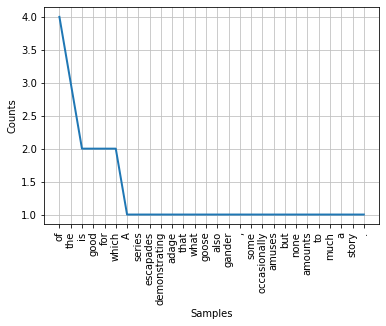

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
fdist.plot(30,cumulative=False)

## Stop Words

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'y', 'below', 'these', 'wasn', 'such', 'd', 'our', "needn't", 'who', 'herself', 'are', 'himself', "shouldn't", 'hers', 'm', 'other', "mustn't", 'i', 'this', 'ain', "hasn't", 'he', 'hadn', 'am', 'me', 'we', 'before', 'does', 'than', 'being', 'over', 'will', 'in', 'and', 'mustn', 'have', 'own', 'if', 'did', 'a', 'my', 'shan', 'myself', "you'd", 'needn', 'that', 'theirs', 'so', 've', 'didn', 'there', "you'll", 'ma', 'whom', 'itself', 'both', 'you', "you're", 'to', 'between', "weren't", 'out', "should've", 'now', 'weren', 'mightn', "wasn't", 'ours', 'when', 'off', 'aren', 'which', 'here', 'ourselves', 'only', 'be', 'why', 'same', 'just', 'has', 'do', 'under', "mightn't", 'they', "aren't", 'them', 'too', "couldn't", 'doing', "wouldn't", 'up', 'haven', 'isn', 'what', 'all', "hadn't", 'should', 'can', 'll', 'very', 'yourself', 'an', 'won', 'themselves', 'was', 'on', 'were', 'as', 'at', 'your', 'o', 'above', 'no', 'it', 'of', 'doesn', 'some', 'those', 'not', "won't", 'because', 'its', 'while'

In [20]:
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
print("Tokenized Word:",tokenized_word)
print("Filterd Word:",filtered_word)


Tokenized Word: ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.']
Filterd Word: ['A', 'series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', ',', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story', '.']


## Lexicon Normalization

### Stemming

In [21]:
print(filtered_word)

['A', 'series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', ',', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story', '.']


In [22]:
from nltk.stem.porter import PorterStemmer

In [23]:
stem = PorterStemmer()
stems = []
for word in filtered_word:
    stems.append(stem.stem(word))
print(stems)

['a', 'seri', 'escapad', 'demonstr', 'adag', 'good', 'goos', 'also', 'good', 'gander', ',', 'occasion', 'amus', 'none', 'amount', 'much', 'stori', '.']


In [24]:
print(dict(zip(filtered_word,stems)))

{'A': 'a', 'series': 'seri', 'escapades': 'escapad', 'demonstrating': 'demonstr', 'adage': 'adag', 'good': 'good', 'goose': 'goos', 'also': 'also', 'gander': 'gander', ',': ',', 'occasionally': 'occasion', 'amuses': 'amus', 'none': 'none', 'amounts': 'amount', 'much': 'much', 'story': 'stori', '.': '.'}


### Lemmatization

In [25]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download("omw-1.4")
nltk.download("wordnet")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
lem = WordNetLemmatizer()
lems = []
for word in filtered_word:
    lems.append(lem.lemmatize(word,"v"))
print(lems)

['A', 'series', 'escapades', 'demonstrate', 'adage', 'good', 'goose', 'also', 'good', 'gander', ',', 'occasionally', 'amuse', 'none', 'amount', 'much', 'story', '.']


In [27]:
print(dict(zip(filtered_word,lems)))

{'A': 'A', 'series': 'series', 'escapades': 'escapades', 'demonstrating': 'demonstrate', 'adage': 'adage', 'good': 'good', 'goose': 'goose', 'also': 'also', 'gander': 'gander', ',': ',', 'occasionally': 'occasionally', 'amuses': 'amuse', 'none': 'none', 'amounts': 'amount', 'much': 'much', 'story': 'story', '.': '.'}


In [30]:
lem.lemmatize("flying","v")

'fly'

# Feature Engineering

## POS (Part of Speech)

In [31]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
print(nltk.pos_tag(tokenized_word))

[('A', 'DT'), ('series', 'NN'), ('of', 'IN'), ('escapades', 'NNS'), ('demonstrating', 'VBG'), ('the', 'DT'), ('adage', 'NN'), ('that', 'IN'), ('what', 'WP'), ('is', 'VBZ'), ('good', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('goose', 'NN'), ('is', 'VBZ'), ('also', 'RB'), ('good', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('gander', 'NN'), (',', ','), ('some', 'DT'), ('of', 'IN'), ('which', 'WDT'), ('occasionally', 'RB'), ('amuses', 'VBZ'), ('but', 'CC'), ('none', 'NN'), ('of', 'IN'), ('which', 'WDT'), ('amounts', 'NNS'), ('to', 'TO'), ('much', 'JJ'), ('of', 'IN'), ('a', 'DT'), ('story', 'NN'), ('.', '.')]


## Bag Of Word

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [34]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['Phrase'])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Sentiment'], test_size=0.3, random_state=1)


In [51]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.6044256482549447


## TF-IDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Phrase'])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['Sentiment'], test_size=0.3, random_state=123)


In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5862915972489213


## Confusion Matrix

In [62]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predicted)

array([[   71,   787,  1216,    36,     0],
       [   36,  2001,  5867,   177,     0],
       [   12,   998, 21439,  1447,    24],
       [    0,    95,  5970,  3800,    64],
       [    0,    11,   982,  1647,   138]], dtype=int64)